In [ ]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.transform import resize


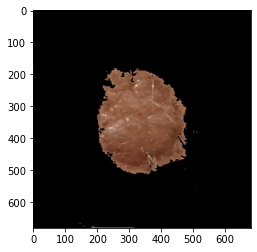

In [180]:

image = cv2.imread('/Users/theakaroline/New.png', cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image = cv2.imread('/Users/theakaroline/New.png', cv2.IMREAD_UNCHANGED)


#imga = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#alpha = src[:,:,3] # Channel 3
#image = np.dstack([imga, alpha]) # Add the alpha channel

plt.imshow(image)

In [ ]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [122]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [227]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    
    hex_colors.remove('#000000')
   # del counts.values()[457537]
    del counts[0]      
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")

    
    print(hex_colors)

['#6f3f29', '#b89074', '#86553c', '#986950']


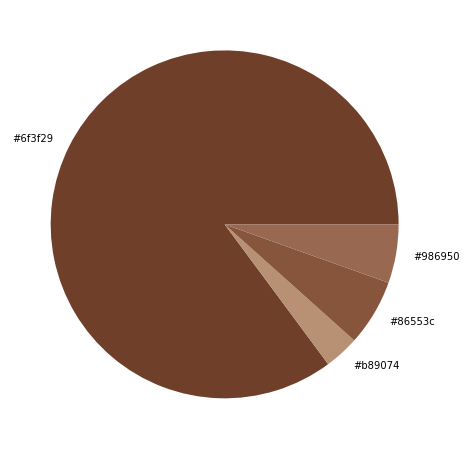

In [ ]:
color_analysis(modified_image)